# Churn Biblioteca

## Importando bibliotecas

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import graphviz

pd.set_option('display.max_columns', 25)

## Importando dados

In [13]:
churn_biblioteca = pd.read_csv('Datasets/churn_biblioteca.csv',sep=';')
churn_biblioteca

,nivel_matricula,institutos,visitou_biblioteca,fez_emprestimo,visitou_biblioteca_digital,visitou_evento,consultou_biblioteca,nota_emprestimo,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais,churn
0,Docência,Física,0,0,0,0,0,3.0,2.0,1.0,3.0,1.0,sim
1,Pós-graduação,Artes,0,0,0,0,0,1.0,0.0,4.0,2.0,1.0,sim
2,Pós-graduação,Artes,0,0,0,0,0,2.0,1.0,2.0,3.0,1.0,sim
3,Docência,Artes,0,0,0,0,0,3.0,1.0,2.0,3.0,0.0,sim
4,Docência,Física,0,0,0,0,0,2.0,2.0,4.0,5.0,3.0,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Graduação,Biologia,1,0,1,0,0,3.0,2.0,5.0,3.0,0.0,não
17996,Pós-graduação,Física,0,1,1,0,0,1.0,5.0,3.0,5.0,0.0,não
17997,Graduação,Geociências,0,0,0,0,1,4.0,1.0,3.0,3.0,2.0,não
17998,Pós-graduação,Biologia,0,0,0,1,0,4.0,1.0,4.0,2.0,2.0,não


## Análise exploratória

In [119]:
churn_biblioteca_sim = churn_biblioteca.query('churn == "sim"')
churn_biblioteca_nao = churn_biblioteca.query('churn == "não"')

In [99]:
def tabela_freq(variavel):
    
    freq_percent = churn_biblioteca[variavel].value_counts(normalize=True).round(2).reset_index()
    freq_percent.columns = [variavel,'percentual']
    return freq_percent

### Nível Matrícula

In [100]:
churn_biblioteca.nivel_matricula.value_counts(normalize=True).round(2)

Graduação        0.45
Pós-graduação    0.45
Docência         0.10
Name: nivel_matricula, dtype: float64

In [120]:
churn_biblioteca_sim.nivel_matricula.value_counts(normalize=True).round(2)

Pós-graduação    0.46
Graduação        0.44
Docência         0.10
Name: nivel_matricula, dtype: float64

In [121]:
churn_biblioteca_nao.nivel_matricula.value_counts(normalize=True).round(2)

Graduação        0.45
Pós-graduação    0.45
Docência         0.10
Name: nivel_matricula, dtype: float64

In [101]:
churn_biblioteca.columns

Index(['nivel_matricula', 'institutos', 'visitou_biblioteca', 'fez_emprestimo',
       'visitou_biblioteca_digital', 'visitou_evento', 'consultou_biblioteca',
       'nota_emprestimo', 'nota_evento', 'nota_infraestrutura', 'nota_acervo',
       'nota_redes_sociais', 'churn'],
      dtype='object')

In [116]:
churn_biblioteca_notas = churn_biblioteca.iloc[:,7:12]
churn_biblioteca_notas.describe().loc[['mean','std']].round(2)

,nota_emprestimo,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais
mean,2.91,2.47,3.22,3.77,2.09
std,1.39,1.04,1.35,1.21,1.65


In [103]:
tabela_freq('nota_emprestimo')

,nota_emprestimo,percentual
0,3.0,0.26
1,2.0,0.22
2,4.0,0.21
3,5.0,0.15
4,1.0,0.11
5,0.0,0.05


Text(0.5, 1.1, 'Distribuição da Nota de empréstimo')

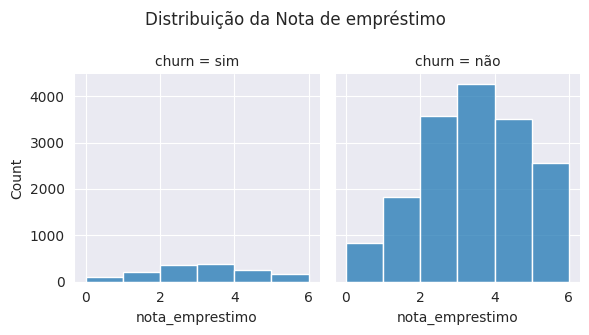

In [92]:
# Cria gráficos de densidade para cada variável
g = sns.FacetGrid(churn_biblioteca, col="churn")
g.map(sns.histplot, "nota_emprestimo", bins=5, binwidth=1, binrange=(0, 6))

g.fig.suptitle('Distribuição da Nota de empréstimo',y=1.1)


## ML

### Transformação dos dados

In [16]:
churn_biblioteca_modificado = churn_biblioteca.copy()

traducao_dic = {'sim' : 1, 'não': 0}
churn_biblioteca_modificado[['churn']] = churn_biblioteca_modificado[['churn']].replace(traducao_dic)

In [17]:
churn_biblioteca_modificado

,nivel_matricula,institutos,visitou_biblioteca,fez_emprestimo,visitou_biblioteca_digital,visitou_evento,consultou_biblioteca,nota_emprestimo,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais,churn
0,Docência,Física,0,0,0,0,0,3.0,2.0,1.0,3.0,1.0,1
1,Pós-graduação,Artes,0,0,0,0,0,1.0,0.0,4.0,2.0,1.0,1
2,Pós-graduação,Artes,0,0,0,0,0,2.0,1.0,2.0,3.0,1.0,1
3,Docência,Artes,0,0,0,0,0,3.0,1.0,2.0,3.0,0.0,1
4,Docência,Física,0,0,0,0,0,2.0,2.0,4.0,5.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Graduação,Biologia,1,0,1,0,0,3.0,2.0,5.0,3.0,0.0,0
17996,Pós-graduação,Física,0,1,1,0,0,1.0,5.0,3.0,5.0,0.0,0
17997,Graduação,Geociências,0,0,0,0,1,4.0,1.0,3.0,3.0,2.0,0
17998,Pós-graduação,Biologia,0,0,0,1,0,4.0,1.0,4.0,2.0,2.0,0


In [28]:
churn_biblioteca_modificado = pd.get_dummies(churn_biblioteca_modificado)
churn_biblioteca_modificado

,visitou_biblioteca,fez_emprestimo,visitou_biblioteca_digital,visitou_evento,consultou_biblioteca,nota_emprestimo,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais,churn,nivel_matricula_Docência,nivel_matricula_Graduação,nivel_matricula_Pós-graduação,institutos_Artes,institutos_Biologia,institutos_Computação,institutos_Economia,institutos_Estudos da Linguagem,institutos_Filosofia e Ciências Humanas,institutos_Física,institutos_Geociências,"institutos_Matemática, Estatística e Computação Científica",institutos_Química
0,0,0,0,0,0,3.0,2.0,1.0,3.0,1.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1.0,0.0,4.0,2.0,1.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,2.0,1.0,2.0,3.0,1.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,3.0,1.0,2.0,3.0,0.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2.0,2.0,4.0,5.0,3.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,0,1,0,0,3.0,2.0,5.0,3.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
17996,0,1,1,0,0,1.0,5.0,3.0,5.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
17997,0,0,0,0,1,4.0,1.0,3.0,3.0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
17998,0,0,0,1,0,4.0,1.0,4.0,2.0,2.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


### Balanceamento de dados

In [33]:
churn_biblioteca_modificado.churn.value_counts(normalize=True)

0    0.920167
1    0.079833
Name: churn, dtype: float64

In [42]:
churn_biblioteca_modificado.shape

(18000, 24)

In [34]:
X = churn_biblioteca_modificado.drop('churn', axis = 1)
y = churn_biblioteca_modificado['churn']

In [37]:
smt = SMOTE(random_state=65486)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [39]:
churn_biblioteca_balanceado = pd.concat([X, y], axis=1)

In [40]:
churn_biblioteca_balanceado.churn.value_counts(normalize=True)

1    0.5
0    0.5
Name: churn, dtype: float64

In [41]:
churn_biblioteca_balanceado.shape

(33126, 24)

## Divisão de treino e teste


In [43]:
X = churn_biblioteca_balanceado.drop('churn', axis = 1)
y = churn_biblioteca_balanceado['churn']

In [109]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2,random_state=6468)

## Modelos


In [110]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_treino,y_treino)
predito_knn = knn.predict(X_teste)
y_pred_knn = knn.predict_proba(X_teste)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_teste, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [111]:
bnb = BernoulliNB(binarize=np.median(X_treino))
bnb.fit(X_treino,y_treino)
predito_bnb = bnb.predict(X_teste)
y_pred_bnb = bnb.predict_proba(X_teste)[:,1]
fpr_bnb, tpr_bnb, _ = roc_curve(y_teste, y_pred_bnb)
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)

In [112]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=351)
dtc.fit(X_treino,y_treino)
predito_arvore_decisao = dtc.predict(X_teste)
y_pred_dtc = dtc.predict_proba(X_teste)[:,1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_teste, y_pred_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

In [114]:
def metricas_classificao(nome_modelo,predicao,auc):

  metricas = classification_report(y_teste, predicao,output_dict=True)
  metricas = pd.DataFrame(metricas)
  df_metricas = pd.DataFrame({'AUC': auc,
                             'F1-score_0': [metricas.iloc[2,0]],
                             'F1-score_1': [metricas.iloc[2,1]],
                             'Acurácia' :  [metricas.iloc[0,2]],
                             'Recall':     [metricas.iloc[1,2]]},
                              index=[nome_modelo])
  
  return df_metricas

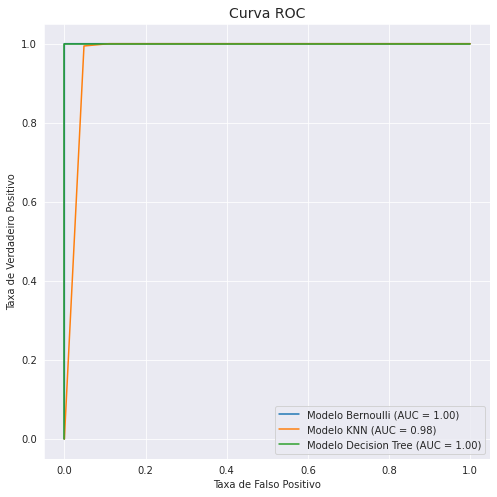

In [115]:
plt.figure(figsize=(8,8))
plt.plot(fpr_bnb, tpr_bnb, label='Modelo Bernoulli (AUC = %0.2f)' % roc_auc_bnb)
plt.plot(fpr_knn, tpr_knn, label='Modelo KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dtc, tpr_dtc, label='Modelo Decision Tree (AUC = %0.2f)' % roc_auc_dtc)


plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC',size=14)
plt.legend(loc="lower right")

plt.show()

In [116]:
metricas_BNB = metricas_classificao('Modelo Bernoulli de Naive Bayes',predito_bnb,roc_auc_bnb).round(3)
metricas_knn = metricas_classificao('Modelo KNN',predito_knn,roc_auc_knn).round(3)
metricas_dtc = metricas_classificao('Modelo Árvore de Decisão',predito_arvore_decisao,roc_auc_dtc).round(3)
metricas_modelos = pd.concat([metricas_BNB,metricas_knn,metricas_dtc])
metricas_modelos

,AUC,F1-score_0,F1-score_1,Acurácia,Recall
Modelo Bernoulli de Naive Bayes,1.000,1.000,1.000,1.000,1.000
Modelo KNN,0.976,0.906,0.919,0.913,0.913
Modelo Árvore de Decisão,1.000,1.000,1.000,1.000,1.000


# O que está errado ?
### Remodelar conjunto de dados... Possivelmente erro está no entendimenot do que é churn da biblioteca. Talvez esteja óbvio e não precisa de complexidade (ML).

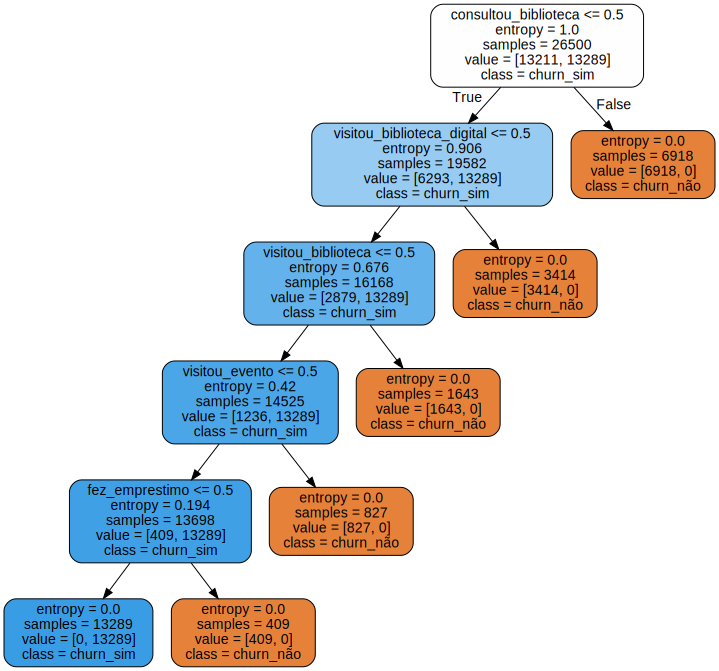

In [123]:
features = X.columns
dot_data = export_graphviz(dtc,
                           filled = True,
                           rounded=True,
                           feature_names=features,
                           class_names=['churn_não','churn_sim'])
grafico = graphviz.Source(dot_data)
grafico